# A simple feedforward neural network

This notebook will be used to code the simple feedforward neural network shown below:

<img src = "network.png">

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Activation function used: f(x) = 1 / (1 + e^(-x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [23]:
# Create a class to represnt a neuron
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        # output = sigmoid((inputs).(weights) + bias)
        result = np.dot(self.weights, inputs) + self.bias
        return sigmoid(result)

In [24]:
# Checking Neuron class
weights = np.array([0,1])
bias = 4
neuron1 = Neuron(weights, bias)
x = np.array([2,3])
print('Output: ', neuron1.feedforward(x))

Output:  0.9990889488055994


In [25]:
class neuralNetwork:
    '''
    This neural network contains
    --> 2 inputs x1 and x2
    --> A hidden layer with 2 neurons h1 and h2
    --> An output layer with a single neuron o1
    
    Each neuron has the same weights and bias:
    --> w = [0, 1]
    --> b = 0 
    '''
    
    def __init__(self):
        # Weights and bias
        weights = np.array([0,1])
        bias = 0
        
        # Creating a neural network
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, inputs):
        # Output of h1 and h2
        output_h1 = self.h1.feedforward(inputs)
        output_h2 = self.h2.feedforward(inputs)
        
        # Final output (o1)
        output_o1 = self.o1.feedforward(np.array([output_h1, output_h2]))
        return output_o1

In [26]:
# Checking the neuralNetwork class

network = neuralNetwork()
x = np.array([2,3])
out = network.feedforward(x)
print('Output of created network:', out)

Output of created network: 0.7216325609518421


In [27]:
print(np.random.normal())

1.2099847715141283


# Complete Neural Network

This NN guesses the gender based on the input weight and height of a person

<img src = 'image2.png'>

In [45]:
import numpy as np

In [46]:
def sigmoid(x):
    # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

In [47]:
def deriv_sigmoid(x):
    # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = sigmoid(x)
    return fx *(1-fx)

In [48]:
def mse_loss(y_true, y_pred):
    # Both y_true and y_pred are numpy arrays. y_true is the expected output and y_pred is the predicted output.
    return ((y_true - y_pred) ** 2).mean()

In [49]:
class NeuralNetwork():
    '''
    This neural network contains
    --> 2 inputs x1 and x2
    --> A hidden layer with 2 neurons h1 and h2
    --> An output layer with a single neuron o1
    
    Each neuron has the different weights and bias:
    '''
    
    def __init__(self):
        # Weights- Randomly assigning the weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        # Bias
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
    def feedforward(self, x):
        # x is a numpy array: x[0] is weight(minus 135) and x[1] is height(minus 66)
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues):
        '''
        --> data is a (n x 2) numpy array, n = # of samples in the dataset. Each row contains 2 elements, weight and height of a person
        --> all_y_trues is a numpy array with n elements. Each element is the expected gender: 0 (male) or 1 (female) 
        --> Elements in all_y_trues correspond to those in data.
        '''
        
        learn_rate = 0.1
        epochs = 1001 # number of times to loop through the entire dataset
        loss_list = []
        
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                h1_sum = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(h1_sum)
                
                h2_sum = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(h2_sum)
                
                o1_sum = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(o1_sum)
                y_pred= o1
                
                '''
                Now we need to re- calculate the weights and biases in such a way that the loss decreases due to that change.
                But for recalculating the new weights, we need dl/dw for each weight w.
                The next steps will be used for that purpose 
                '''
                
                # --- Calculate partial derivatives.
                # --- Naming: d_L_d_w1 represents "partial L / partial w1"
                d_L_d_ypred = -2 * (y_true - y_pred)
                
                #  Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(o1_sum)
                d_ypred_d_w6 = h2 * deriv_sigmoid(o1_sum)
                d_ypred_d_b3 = deriv_sigmoid(o1_sum)
                
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(o1_sum)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(o1_sum)
                
                # Neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(h1_sum)
                d_h1_d_w2 = x[1] * deriv_sigmoid(h1_sum)
                d_h1_d_b1= deriv_sigmoid(h1_sum)
                
                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(h2_sum)
                d_h2_d_w4 = x[1] * deriv_sigmoid(h2_sum)
                d_h2_d_b2= deriv_sigmoid(h2_sum)
                
                # --- After calculating the necessary derivatives we have to update the weights and biases
                # Neuron h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                # Neuron h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

                # Neuron o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
                
            # Calculating the loss at the end of each epoch divisible by 10
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                '''
                np.apply_along_axis: Apply a function to 1-D slices along the given axis.
                This will pass each 1-D row of data matrix into feedforward func. Output for each row will be stored in y_preds
                '''
                loss = mse_loss(all_y_trues, y_preds)
                loss_list.append(loss)
                print("Epoch %d loss: %.3f" % (epoch, loss))
                
        return loss_list


In [50]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train the neural network
network = NeuralNetwork()
losses = network.train(data, all_y_trues)

Epoch 0 loss: 0.283
Epoch 10 loss: 0.207
Epoch 20 loss: 0.153
Epoch 30 loss: 0.115
Epoch 40 loss: 0.087
Epoch 50 loss: 0.068
Epoch 60 loss: 0.054
Epoch 70 loss: 0.044
Epoch 80 loss: 0.036
Epoch 90 loss: 0.031
Epoch 100 loss: 0.026
Epoch 110 loss: 0.023
Epoch 120 loss: 0.021
Epoch 130 loss: 0.018
Epoch 140 loss: 0.017
Epoch 150 loss: 0.015
Epoch 160 loss: 0.014
Epoch 170 loss: 0.013
Epoch 180 loss: 0.012
Epoch 190 loss: 0.011
Epoch 200 loss: 0.010
Epoch 210 loss: 0.010
Epoch 220 loss: 0.009
Epoch 230 loss: 0.009
Epoch 240 loss: 0.008
Epoch 250 loss: 0.008
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.007
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.006
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.005
Epoch 380 loss: 0.005
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

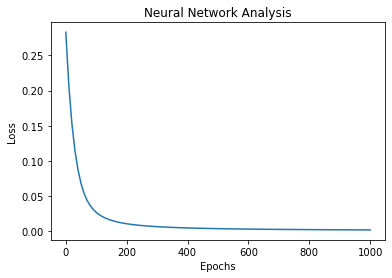

In [51]:
# Plotting the loss

epochs = np.arange(0, 1001, 10)

plt.plot(epochs, losses)
plt.title("Neural Network Analysis")
plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.show()

In [52]:
# Making new predictions

def gender(output):
    if output > 0.9:
        return 'Female'
    elif output<0.1:
        return 'Male'
    else:
        return 'Unknown'

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches

res1 = network.feedforward(emily)
res2 = network.feedforward(frank)

print("Emily: %.3f" % res1, gender(res1)) 
print("Frank: %.3f" % res2, gender(res1))

Emily: 0.968 Female
Frank: 0.039 Female


Click 
<a href="https://victorzhou.com/blog/intro-to-neural-networks/">here</a>
to visit the blog which I referred